In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Original Image')

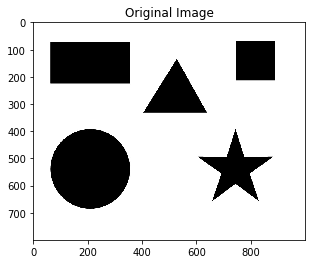

In [6]:
image_path= 'images\image4.jpg'
image = cv2.imread(image_path)
plt.imshow(image)
plt.title("Original Image")

In [7]:
gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
_,thresh = cv2.threshold(gray_img,127,255,1)
contours,_ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
print("Number of contours: ",len(contours))
print(contours[0])

Number of contours:  5
[[[744 393]]

 [[744 394]]

 [[743 395]]

 ...

 [[745 396]]

 [[745 395]]

 [[744 394]]]


In [32]:
for contour in contours:
    vertices = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    M = cv2.moments(contour)
    x = int(M['m10']/M['m00'])
    y = int(M['m01']/M['m00'])
    
    if len(vertices)==3:
        text = 'Triangle'
        cv2.drawContours(image,[contour],0,(0,255,0),-1)
        cv2.putText(image,text,(x-50,y),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0))
        
    elif len(vertices)==4:
        x,y,w,h = cv2.boundingRect(contour)
        asRatio = float(w/h)
        if asRatio >= 0.95 and asRatio <= 1.05:
            text = 'Square'
            cv2.drawContours(image,[contour],0,(0,255,0),-1)
            cv2.putText(image,text,(x-50,y),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0))
            
        else:
            text = 'Rectangle'
            cv2.drawContours(image,[contour],0,(0,255,0),-1)
            cv2.putText(image,text,(x-50,y),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0))
        
    elif len(vertices)==5:
        text = 'Pentagon'
        cv2.drawContours(image,[contour],0,(0,255,0),-1)
        cv2.putText(image,text,(x-50,y),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0))
        
    elif len(vertices)==10 or len(vertices)==8:
        text = 'Star'
        cv2.drawContours(image,[contour],0,(0,255,0),-1)
        cv2.putText(image,text,(x-50,y),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0))
            
    else:
         text = "Circle"
         cv2.drawContours(image,[contour],0,(0,255,0),-1)
         cv2.putText(image,text,(x-50,y),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0))
    print(len(vertices))

10
15
3
4
4


Text(0.5, 1.0, 'Identified Shapes')

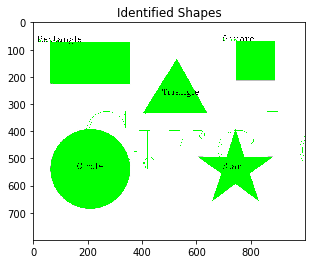

In [33]:
plt.imshow(image)
plt.title("Identified Shapes")

In [35]:
image_path2 = 'images\image4.jpg'
image2 = cv2.imread(image_path2)
gray_img2 = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY) 
blur_img = cv2.GaussianBlur(gray_img2,(5,5),0)
_,thresh2 = cv2.threshold(blur_img,127,255,1)
canny_img = cv2.Canny(thresh2,50,200)

In [37]:
contours,_ = cv2.findContours(canny_img.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
print("Number of Contours: ",len(contours))

Number of Contours:  5


In [42]:
def area(contours):
    areas = []
    for contour in contours:
        temp_area = cv2.contourArea(contour)
        areas.append(temp_area)
        
    return areas

sorted_contours = sorted(contours,key=cv2.contourArea,reverse=True)
print("Sorted Areas", area(sorted_contours))

Sorted Areas [67200.5, 45111.0, 23822.5, 23183.5, 20873.0]


In [46]:
for i,contour in enumerate(sorted_contours):
    cv2.drawContours(image2,[contour],-1,(0,255,0),3)
    M = cv2.moments(contour)
    x = int(M['m10']/M['m00'])
    y = int(M['m01']/M['m00'])
    cv2.putText(image2,str(i+1),(x-1,y+10),cv2.FONT_ITALIC,1,(255,255,255),1)

Text(0.5, 1.0, 'Sorted by Area')

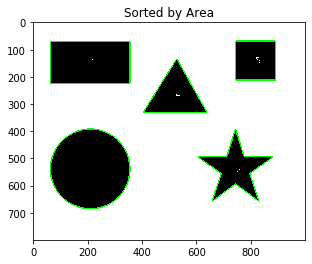

In [47]:
plt.imshow(image2)
plt.title("Sorted by Area")